In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,root_mean_squared_error


In [3]:
df = pd.read_csv('BTC-USDp.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Volume,1 day(s) ago,2 day(s) ago,3 day(s) ago,4 day(s) ago,...,51 day(s) ago,52 day(s) ago,53 day(s) ago,54 day(s) ago,55 day(s) ago,56 day(s) ago,57 day(s) ago,58 day(s) ago,59 day(s) ago,60 day(s) ago
0,2014-11-16,374.730011,390.799011,374.601990,387.881989,11905600,376.132996,397.817993,420.734985,423.561005,...,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
1,2014-11-17,388.348999,410.199005,377.502014,387.407990,41518800,387.881989,376.132996,397.817993,420.734985,...,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2,2014-11-18,387.785004,392.402008,371.117004,375.197998,32222500,387.407990,387.881989,376.132996,397.817993,...,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
3,2014-11-19,373.895996,386.480988,373.895996,380.554993,18931800,375.197998,387.407990,387.881989,376.132996,...,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
4,2014-11-20,380.307007,382.024994,356.781006,357.839996,25233200,380.554993,375.197998,387.407990,387.881989,...,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014
5,2014-11-21,357.878998,357.878998,344.112000,350.847992,29850100,357.839996,380.554993,375.197998,387.407990,...,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008
6,2014-11-22,351.604004,364.841003,350.877991,352.920013,15273000,350.847992,357.839996,380.554993,375.197998,...,375.071991,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985
7,2014-11-23,353.174988,370.845001,353.174988,367.572998,15151600,352.920013,350.847992,357.839996,380.554993,...,359.511993,375.071991,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987
8,2014-11-24,366.947998,387.209015,366.669006,376.901001,30930100,367.572998,352.920013,350.847992,357.839996,...,328.865997,359.511993,375.071991,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005
9,2014-11-25,376.885986,394.700989,374.783997,375.347992,25442200,376.901001,367.572998,352.920013,350.847992,...,320.510010,328.865997,359.511993,375.071991,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988


## SPLITTING DATA
- We split our dataset manually as using the train_test_split by default takes samples randomly. Though this is a recommended machine learning technique it did not apply to our use case as we are dealing with time series data and that would be "cheating"

In [5]:
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]


In [6]:
X_train = train_data.drop(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'], axis=1)
y_train = train_data['Close']
X_test = test_data.drop(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'], axis=1)
y_test = test_data['Close']
dates_test = test_data['Date']


## SCALING DATA

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
X_train

,1 day(s) ago,2 day(s) ago,3 day(s) ago,4 day(s) ago,5 day(s) ago,6 day(s) ago,7 day(s) ago,8 day(s) ago,9 day(s) ago,10 day(s) ago,...,51 day(s) ago,52 day(s) ago,53 day(s) ago,54 day(s) ago,55 day(s) ago,56 day(s) ago,57 day(s) ago,58 day(s) ago,59 day(s) ago,60 day(s) ago
0,376.132996,397.817993,420.734985,423.561005,367.695007,366.924011,363.264008,345.488007,342.415009,349.290009,...,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
1,387.881989,376.132996,397.817993,420.734985,423.561005,367.695007,366.924011,363.264008,345.488007,342.415009,...,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2,387.407990,387.881989,376.132996,397.817993,420.734985,423.561005,367.695007,366.924011,363.264008,345.488007,...,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
3,375.197998,387.407990,387.881989,376.132996,397.817993,420.734985,423.561005,367.695007,366.924011,363.264008,...,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
4,380.554993,375.197998,387.407990,387.881989,376.132996,397.817993,420.734985,423.561005,367.695007,366.924011,...,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2802,22485.689453,20779.343750,21190.316406,20836.328125,20569.919922,20212.074219,19323.914063,19970.556641,20860.449219,21592.207031,...,29445.957031,28814.900391,28627.574219,29267.224609,29562.361328,29655.585938,29098.910156,30323.722656,29432.226563,29200.740234
2803,23389.433594,22485.689453,20779.343750,21190.316406,20836.328125,20569.919922,20212.074219,19323.914063,19970.556641,20860.449219,...,31726.390625,29445.957031,28814.900391,28627.574219,29267.224609,29562.361328,29655.585938,29098.910156,30323.722656,29432.226563
2804,23231.732422,23389.433594,22485.689453,20779.343750,21190.316406,20836.328125,20569.919922,20212.074219,19323.914063,19970.556641,...,31792.310547,31726.390625,29445.957031,28814.900391,28627.574219,29267.224609,29562.361328,29655.585938,29098.910156,30323.722656
2805,23164.628906,23231.732422,23389.433594,22485.689453,20779.343750,21190.316406,20836.328125,20569.919922,20212.074219,19323.914063,...,29799.080078,31792.310547,31726.390625,29445.957031,28814.900391,28627.574219,29267.224609,29562.361328,29655.585938,29098.910156


## HYPERPARAMETER TUNING

In [9]:
import time 
min_samples_split_list = [2, 100, 30, 50, 100, 200, 300, 2]
max_depth_list = [2, 4, 8, 16, 32, 64, None, None]
n_estimators_list = [10, 50, 100, 200, 300, 500, 1000, 100]
times = []
maes = []
mses = []
r2s = []

for idx, val in enumerate(n_estimators_list):
    start_time = time.time()  # Record the start time

    # Initialize and train the RandomForestRegressor with current hyperparameters
    forest_reg = RandomForestRegressor( # type: ignore
        n_estimators=n_estimators_list[idx],
        max_depth=max_depth_list[idx],
        min_samples_split=min_samples_split_list[idx],
        random_state=42
    )
    forest_reg.fit(X_train, y_train)

    end_time = time.time()  # Record the end time
    times.append(end_time - start_time)  # Calculate and store the duration

    # Predict the prices for the test set
    y_pred = forest_reg.predict(X_test) # type: ignore

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred) # type: ignore
    mse = mean_squared_error(y_test, y_pred) # type: ignore
    r2 = r2_score(y_test, y_pred) # type: ignore

    # Append metrics to respective lists
    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)


In [10]:
maes

[8066.715195227913,
 3490.0148404772776,
 1304.2733067700976,
 1627.7949856793007,
 3374.4255607094806,
 5794.2732779235885,
 6102.675796859044,
 1233.0262443906176]

In [11]:
r2s

[0.6995204265572297,
 0.9285149915540403,
 0.9823951288785542,
 0.9782244181441977,
 0.9316339386877501,
 0.8131273419331256,
 0.7978053267646139,
 0.9865210706122575]

In [14]:
comparison_df = pd.DataFrame({
    'Date': dates_test,
    'True_Price': y_test,
    'Predicted_Price': y_pred,
    'Difference(abs)': abs(y_pred-y_test)
})
comparison_df

comparison_df.head(10)

,Date,True_Price,Predicted_Price,Difference(abs)
2807,2022-07-24,22609.164063,22550.144805,59.019258
2808,2022-07-25,21361.701172,22658.569805,1296.868633
2809,2022-07-26,21239.753906,22094.839551,855.085645
2810,2022-07-27,22930.548828,21805.536387,1125.012441
2811,2022-07-28,23843.886719,22664.006445,1179.880274
2812,2022-07-29,23804.632813,22924.135547,880.497266
2813,2022-07-30,23656.207031,23143.685488,512.521543
2814,2022-07-31,23336.896484,23028.973027,307.923457
2815,2022-08-01,23314.199219,23001.723535,312.475684
2816,2022-08-02,22978.117188,22895.463281,82.653907


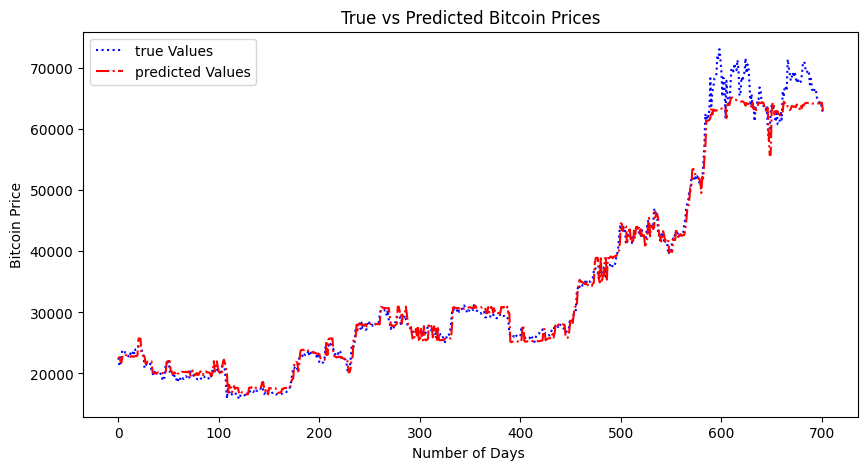

In [15]:
#viewing it on a monthly basis for better visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['True_Price'].values, label='true Values',color='blue',linestyle='dotted')
plt.plot(comparison_df['Predicted_Price'].values,linestyle='dashdot', label='predicted Values',color='red')
plt.xlabel('Number of Days ')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.title('True vs Predicted Bitcoin Prices')
plt.show()


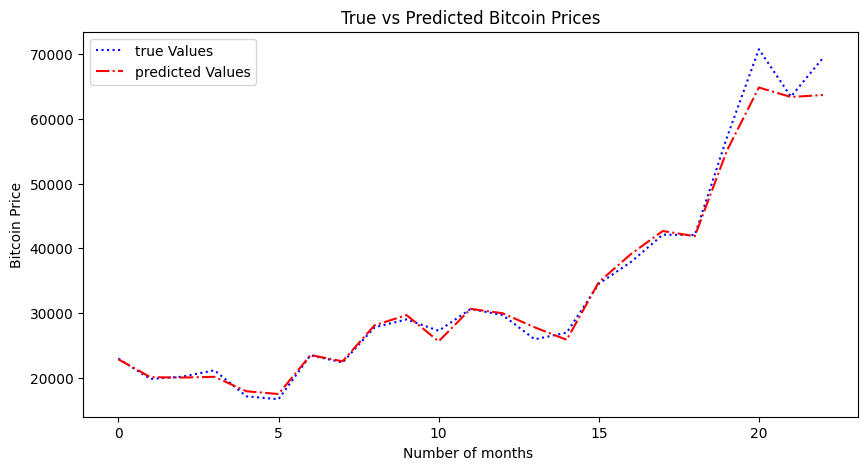

In [16]:
#viewing it on a monthly basis for better visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(comparison_df[comparison_df.index%30==0]['True_Price'].values, label='true Values',color='blue',linestyle='dotted')
plt.plot(comparison_df[comparison_df.index%30==0]['Predicted_Price'].values,linestyle='dashdot', label='predicted Values',color='red')
plt.xlabel('Number of months ')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.title('True vs Predicted Bitcoin Prices')
plt.show()
